<a href="https://colab.research.google.com/github/Amal-Emad/AS1_CNN/blob/main/Ass1_CNN_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN)

In this assignment, You will build and train a convolutional neural network (CNN) for image classification. The CIFAR-10 dataset will be used to train a CNN model from scratch and using the Xception pre-trained model. Comparing the results of the two models.
Tasks:
* Import a dataset
* Dataset pre-processing
* Building and Training a model from scratch
* Using a pre-trained model
* Comparing the models

In [4]:
# import some libraries
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

## Import the Dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. Classes include *Airplane*, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck.<br>

In [5]:
# load the dataset
num_classes = 10
new_im_size = 32
channels = 3
cifar10 = tf.keras.datasets.cifar10
# TODO: load the dataset
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
# TODO: print the target image values.
print(f"Train Image Shape: {train_images.shape}")
print(f"Train Label Shape: {train_labels.shape}")
print(f"Test Image Shape: {test_images.shape}")
print(f"Test Label Shape: {test_labels.shape}")

170498071/170498071 [==============================] - 9s 0us/step
Train Image Shape: (50000, 32, 32, 3)
Train Label Shape: (50000, 1)
Test Image Shape: (10000, 32, 32, 3)
Test Label Shape: (10000, 1)


## Dataset pre-processing
As pre-processing steps we apply

* Normalization in [0 1], to speed up learning and have faster convergence
* Splitting the training dataset into training and validation subsets(needed for an appropriate learning pipeline) and label preprocessing (one-hot encoding)
* Standardization, to obtain a distribution with mean equal to 0 and a standard deviation equal to 1.

In [6]:
# TODO: Normalize the data in [0 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
# TODO: Split the training dataset into training and validation subsets, the validation size is 25%.
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)



In [8]:
# Standardizing the data
def standardize_dataset(X):
    image_means = []
    image_stds = []

    for image in X:
        image_means.append(np.mean(image)) # Computing the image mean
        image_stds.append(np.std(image)) # Computing the image standard deviation

    dataset_mean = np.mean(image_means) # Computing the dataset mean
    dataset_std = np.mean(image_stds) # Computing the dataset standard deviation
    return [dataset_mean, dataset_std] # For every image we subtract to it the dataset mean and we divide by the dataset standard deviation

# TODO: Standardize the datasets using the above declared method.
dataset_mean, dataset_std = standardize_dataset(train_images)
train_images = (train_images - dataset_mean) / dataset_std
val_images = (val_images - dataset_mean) / dataset_std
test_images = (test_images - dataset_mean) / dataset_std
# One hot encoding: A one hot encoding is a representation of categorical variables as binary vectors.
# It allow the model to process and learn from this information and improve the resulting accuracy
# TODO: Apply one hot encoder for the target values
# use the following method tf.keras.utils.to_categorical
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

# TODO: print the size of training, validation, and test subsets

print(f"Size of Training Subset: {len(train_images)}")
print(f"Size of Validation Subset: {len(val_images)}")
print(f"Size of Test Subset: {len(test_images)}")

Size of Training Subset: 37500
Size of Validation Subset: 12500
Size of Test Subset: 10000


## Building and Training a model from scratch
Now that we have properly pre-processed our data, we are going to create a convolutional model in Keras.
Usually a convolutional model is made by two subsequent part:
* A convolution part
* A fully connected

Usually the convolution part is made by some layers as Convolution layer, ReLU activation function layer, MaxPooling layer, and dropout layer.

The convolution part produces its output and the fully connected part ties together the received information in order to solve the classification problem.

In [9]:
# Creating the model from scratch
import tensorflow.keras
from tensorflow.keras import Sequential,Input,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import ReLU
from sklearn.metrics import accuracy_score

# TODO: Build here your model.
model = Sequential()
# TODO: Try to use one convolution layer, with 128 kernels of size 3x3, joint with ReLU, MaxPooling, and Dropout layers
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(new_im_size, new_im_size, channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# TODO: ADD FURTHER CONV LAYERS HERE LATER
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# TODO: Add the fully connected (dense) final part: Flatten + Dense with 32 neurons (<-- CHANGE THIS!!) and relu + Dropout 25% + Dense with 10 neurons and softmax
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))


In [10]:
# TODO: Compile the model with the Adam optimizer

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# TODO: Train the model

# Network parameters (Try different values)
batch_size = 64 # Setting the batch size
epochs = 20 # Setting the number of epochs
scratch_history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(val_images, val_labels))

Epoch 1/20
586/586 [==============================] - 17s 11ms/step - loss: 1.7819 - accuracy: 0.3498 - val_loss: 1.3926 - val_accuracy: 0.4966
Epoch 2/20
586/586 [==============================] - 5s 9ms/step - loss: 1.4759 - accuracy: 0.4643 - val_loss: 1.2681 - val_accuracy: 0.5501
Epoch 3/20
586/586 [==============================] - 5s 9ms/step - loss: 1.3434 - accuracy: 0.5148 - val_loss: 1.1752 - val_accuracy: 0.5822
Epoch 4/20
586/586 [==============================] - 5s 9ms/step - loss: 1.2547 - accuracy: 0.5522 - val_loss: 1.1008 - val_accuracy: 0.6149
Epoch 5/20
586/586 [==============================] - 5s 9ms/step - loss: 1.1953 - accuracy: 0.5745 - val_loss: 1.0355 - val_accuracy: 0.6364
Epoch 6/20
586/586 [==============================] - 5s 9ms/step - loss: 1.1446 - accuracy: 0.5987 - val_loss: 0.9951 - val_accuracy: 0.6571
Epoch 7/20
586/586 [==============================] - 5s 9ms/step - loss: 1.1100 - accuracy: 0.6074 - val_loss: 0.9618 - val_accuracy: 0.6590
Epoc

In [11]:
# TODO: Evaluate and print the accuracy of the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 4ms/step - loss: 0.8397 - accuracy: 0.7104
Test accuracy: 0.7103999853134155


### Try to make the network deeper, adding more Conv and Pooling layers. Does the performance improve?

## Using a pre-trained model
A common alternative to train a model from scratch consists in using a pre-trained model.<br>
The idea is to replace the convolution part with a highly optimized convolutional part engineered and trained previously by someone else.<br> Usually the models that we can use through keras.applications have been trained over the ImageNet dataset. <br>
You are going to use the Xception Net model.

In [12]:
# Creating the model based over the pretrained Xception network
from tensorflow.keras import applications
import tensorflow
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model = models.Sequential()

model.add(tensorflow.keras.layers.UpSampling2D(size=(7,7),input_shape=(32,32,3)))

Xception_model = applications.Xception(weights = "imagenet", include_top=False, input_shape = (224, 224, channels))

for layer in Xception_model.layers:
    layer.trainable = False

Inputs = layers.Input(shape=(32,32,3))
x = model(Inputs)
x = Xception_model(x)
# TODO: Add Flatten layer + Dense with 128 neurons and relu + Dense with 10 neurons and softmax
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
predictions = layers.Dense(10, activation='softmax')(x)  #  10 output classes

# Define the final model by specifying the input and output layers
model = models.Model(inputs=Inputs, outputs=predictions)

83683744/83683744 [==============================] - 0s 0us/step


In [14]:
from tensorflow.keras import optimizers

# Compile the model with the Adam optimizer
model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(val_images, val_labels))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Print the accuracy of the model on the test dataset
print(f"Test accuracy: {test_accuracy}")

Epoch 1/5
1172/1172 [==============================] - 240s 202ms/step - loss: 0.6224 - accuracy: 0.7894 - val_loss: 0.7573 - val_accuracy: 0.7456
Epoch 2/5
1172/1172 [==============================] - 237s 202ms/step - loss: 0.4495 - accuracy: 0.8461 - val_loss: 0.6581 - val_accuracy: 0.7928
Epoch 3/5
1172/1172 [==============================] - 205s 175ms/step - loss: 0.3581 - accuracy: 0.8755 - val_loss: 0.7612 - val_accuracy: 0.7737
Epoch 4/5
1172/1172 [==============================] - 210s 179ms/step - loss: 0.2831 - accuracy: 0.9019 - val_loss: 0.8063 - val_accuracy: 0.7776
Epoch 5/5
313/313 [==============================] - 40s 127ms/step - loss: 0.8761 - accuracy: 0.7795
Test accuracy: 0.7795000076293945


In [15]:
# TODO: With the model trained, predict some images
num_images_to_predict = 10
predictions = model.predict(test_images[:num_images_to_predict])
predicted_labels = np.argmax(predictions, axis=1)
print(f"Predicted labels for the first {num_images_to_predict} test images:")
for i in range(num_images_to_predict):
    print(f"Image {i + 1}: Predicted Label - {predicted_labels[i]}")

1/1 [==============================] - 1s 1s/step
Predicted labels for the first 10 test images:
Image 1: Predicted Label - 3
Image 2: Predicted Label - 8
Image 3: Predicted Label - 8
Image 4: Predicted Label - 0
Image 5: Predicted Label - 6
Image 6: Predicted Label - 6
Image 7: Predicted Label - 1
Image 8: Predicted Label - 6
Image 9: Predicted Label - 3
Image 10: Predicted Label - 1


## Comparing the models

Compare the obtained results during training for both the "from scratch" and the "pre-trained" models, consider accuracy and loss.<br> **What information can you get from these plots?**<br>

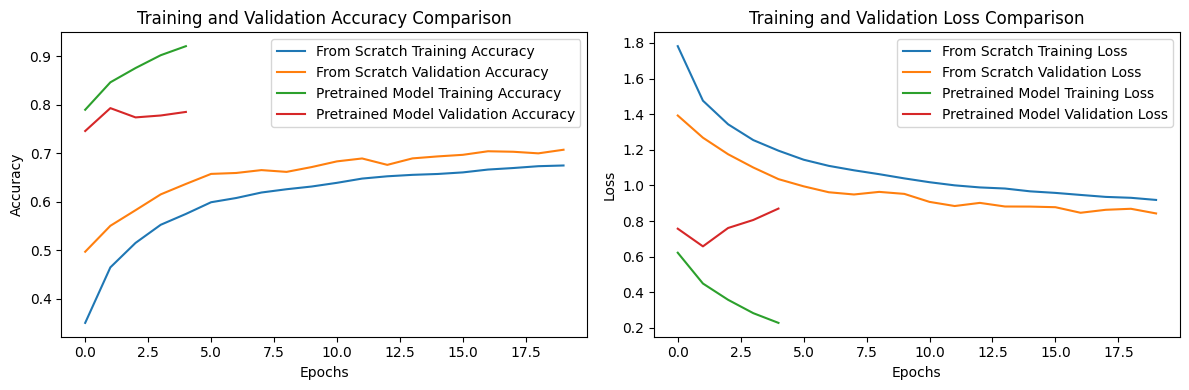

In [18]:
# TODO: Create here the plots to compare the "from scratch" model and the "pretrained" model
# TODO: Produce a comparison plot about the accuracies (train and validation) and another plot for the losses

import matplotlib.pyplot as plt

# 'from scratch' model history (assuming you have this history from training)
scratch_acc = scratch_history.history['accuracy']
scratch_val_acc = scratch_history.history['val_accuracy']
scratch_loss = scratch_history.history['loss']
scratch_val_loss = scratch_history.history['val_loss']

# 'pretrained' model history (assuming you have this history from training)
pretrained_acc = history.history['accuracy']
pretrained_val_acc = history.history['val_accuracy']
pretrained_loss = history.history['loss']
pretrained_val_loss = history.history['val_loss']

# Plotting Accuracies
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(scratch_acc, label='From Scratch Training Accuracy')
plt.plot(scratch_val_acc, label='From Scratch Validation Accuracy')
plt.plot(pretrained_acc, label='Pretrained Model Training Accuracy')
plt.plot(pretrained_val_acc, label='Pretrained Model Validation Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Losses
plt.subplot(1, 2, 2)
plt.plot(scratch_loss, label='From Scratch Training Loss')
plt.plot(scratch_val_loss, label='From Scratch Validation Loss')
plt.plot(pretrained_loss, label='Pretrained Model Training Loss')
plt.plot(pretrained_val_loss, label='Pretrained Model Validation Loss')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
